# Formulasi Masalah


---


Diberikan suatu dataset yaitu dataset 
salju (**NIM akhir ganjil**). Berdasarkan dataset tersebut, permasalahan yang harus diselesaikan adalah bagaimana memprediksi apakah besok akan turun salju atau tidak. Untuk itu, dilakukan *task clustering* terhadap suatu variabel data yang dipilih yaitu "Suhu9am" dan "Kelembaban3pm". *Clustering* bertujuan untuk melihat arah persebaran data dari kedua variabel data yang sudah dipilih. K-Means merupakan algoritma yang digunakan untuk *clustering* data, kemudian dilakukan evaluasi menggunakan *Elbow Method* guna mendapatkan hasil *clustering* yang optimal.

**Penggunaan library**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
import random as rd
import seaborn as sns
from matplotlib import style

# Eksplorasi dan Persiapan Data


**Import dataset dan pengecekan data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load data salju_train.csv
df_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salju_train.csv')
 
#menampilkan 5 data pertama
df_data_train.head(5)

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [4]:
#load data salju_test.csv
df_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/salju_test.csv')

#menampilkan 5 data pertama
df_data_test.head(5)

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [5]:
#menggabung data train dan data test
df_concat = pd.concat([df_data_train, df_data_test])

df_concat

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1.0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2.0,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3.0,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4.0,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5.0,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,NaN,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,NW,22.0,13.0,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,NaN,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,WNW,17.0,20.0,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,NaN,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,NW,0.0,4.0,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,NaN,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,ENE,2.0,26.0,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


In [6]:
#menampilkan tipe data setiap kolom
df_concat.dtypes

id                          float64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [7]:
#menampilkan no index dan tipe data
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127277 entries, 0 to 18181
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  float64
 1   Tanggal                   127277 non-null  object 
 2   KodeLokasi                127277 non-null  object 
 3   SuhuMin                   125990 non-null  float64
 4   SuhuMax                   126183 non-null  float64
 5   Hujan                     124459 non-null  float64
 6   Penguapan                 72397 non-null   float64
 7   SinarMatahari             66180 non-null   float64
 8   ArahAnginTerkencang       118252 non-null  object 
 9   KecepatanAnginTerkencang  118307 non-null  float64
 10  ArahAngin9am              118046 non-null  object 
 11  ArahAngin3pm              123584 non-null  object 
 12  KecepatanAngin9am         125726 non-null  float64
 13  KecepatanAngin3pm         124620 non-null  fl

In [8]:
#print kolom yang bertipe data numeric
df_concat._get_numeric_data().columns

Index(['id', 'SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm'],
      dtype='object')

**Drop kolom bertipe data "object"**

In [9]:
drop_data = df_concat.drop(columns=['id', 'Tanggal', 'KodeLokasi', 'ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm', 'BersaljuHariIni', 'BersaljuBesok'])

drop_data.head(5)

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,10.4,15.5,4.8,NaN,NaN,24.0,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0
1,9.0,17.0,8.0,2.6,7.4,NaN,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,18.2,32.0,0.0,NaN,NaN,44.0,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6
3,7.3,24.5,0.0,8.4,10.4,54.0,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,5.9,20.3,0.0,3.6,12.6,37.0,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1


### Prepocessing Data

**Cek missing value**

In [10]:
#menghitung jumlah nilai null
drop_data.isnull().sum()

SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
KecepatanAnginTerkencang     8970
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
dtype: int64

**Mengisi nilai null dengan mean**

In [11]:
drop_data['SuhuMin'].fillna(value=drop_data['SuhuMin'].mean(), inplace=True)
drop_data['SuhuMax'].fillna(value=drop_data['SuhuMax'].mean(), inplace=True)
drop_data['Hujan'].fillna(value=drop_data['Hujan'].mean(), inplace=True)
drop_data['Penguapan'].fillna(value=drop_data['Penguapan'].mean(), inplace=True)
drop_data['SinarMatahari'].fillna(value=drop_data['SinarMatahari'].mean(), inplace=True)
drop_data['KecepatanAnginTerkencang'].fillna(value=drop_data['KecepatanAnginTerkencang'].mean(), inplace=True)
drop_data['KecepatanAngin9am'].fillna(value=drop_data['KecepatanAngin9am'].mean(), inplace=True)
drop_data['KecepatanAngin3pm'].fillna(value=drop_data['KecepatanAngin3pm'].mean(), inplace=True)
drop_data['Kelembaban9am'].fillna(value=drop_data['Kelembaban9am'].mean(), inplace=True)
drop_data['Kelembaban3pm'].fillna(value=drop_data['Kelembaban3pm'].mean(), inplace=True)
drop_data['Tekanan9am'].fillna(value=drop_data['Tekanan9am'].mean(), inplace=True)
drop_data['Tekanan3pm'].fillna(value=drop_data['Tekanan3pm'].mean(), inplace=True)
drop_data['Awan9am'].fillna(value=drop_data['Awan9am'].mean(), inplace=True)
drop_data['Awan3pm'].fillna(value=drop_data['Awan3pm'].mean(), inplace=True)
drop_data['Suhu9am'].fillna(value=drop_data['Suhu9am'].mean(), inplace=True)
drop_data['Suhu3pm'].fillna(value=drop_data['Suhu3pm'].mean(), inplace=True)

**Normalisasi data**
<br>
Normalisasi data dilakukan menggunakan metode Min-Max Scalling

In [12]:
#melakukan pencilan data
drop_data = (drop_data - drop_data.min()) / (drop_data.max() - drop_data.min())
drop_data

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,0.445755,0.383743,0.012938,0.037718,0.524407,0.139535,0.000000,0.149425,0.78,0.76,0.654545,0.662400,0.494527,0.501511,0.428270,0.391555
1,0.412736,0.412098,0.021563,0.017931,0.510345,0.263750,0.100000,0.229885,0.80,0.61,0.573554,0.600000,0.777778,0.555556,0.402954,0.401152
2,0.629717,0.695652,0.000000,0.037718,0.524407,0.294574,0.115385,0.298851,0.62,0.42,0.613799,0.610285,0.494527,0.501511,0.654008,0.671785
3,0.372642,0.553875,0.000000,0.057931,0.717241,0.372093,0.100000,0.218391,0.25,0.17,0.639669,0.636800,0.111111,0.777778,0.474684,0.548944
4,0.339623,0.474480,0.000000,0.024828,0.868966,0.240310,0.169231,0.218391,0.55,0.48,0.647934,0.601600,0.222222,0.666667,0.413502,0.451056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,0.384434,0.578450,0.000000,0.055172,0.910345,0.193798,0.169231,0.149425,0.59,0.21,0.604959,0.593600,0.666667,0.111111,0.506329,0.564299
18178,0.492925,0.593573,0.000000,0.055172,0.800000,0.240310,0.130769,0.229885,0.59,0.25,0.689256,0.665600,0.111111,0.111111,0.512658,0.596929
18179,0.358491,0.523629,0.000000,0.037718,0.524407,0.263750,0.000000,0.045977,0.84,0.35,0.613799,0.610285,0.111111,0.222222,0.400844,0.525912
18180,0.495283,0.595463,0.000000,0.062069,0.744828,0.224806,0.015385,0.298851,0.56,0.45,0.684298,0.656000,0.555556,0.555556,0.635021,0.591171


In [26]:
#menyimpan dataframe drop_data sebagai file CSV
drop_data.to_csv('1301184309_PUTRI NURIKA_DATA EKSPLORASI.csv', index=False, header=True)

**Menampilkan korelasi antar variabel menggunakan heatmap**

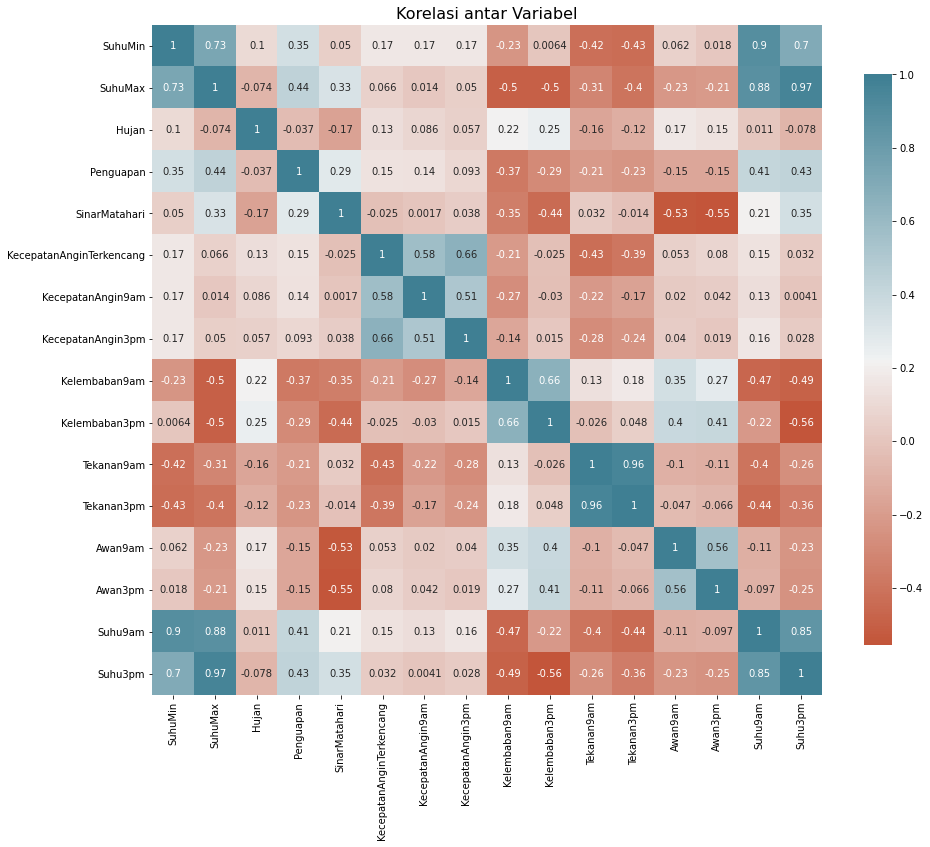

In [14]:
#korelasi antar variabel
corr = drop_data.corr()
f, ax = plt.subplots(figsize=(15,15))
plt.title('Korelasi antar Variabel', y=1, size=16)
ax = sns.heatmap(corr,
                 square=True, 
                 #vmax=0.8,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 annot=True,
                 cbar_kws={'shrink': .7}
                 )

# Pemodelan (K-Means)

**Memilih fitur clustering**

In [15]:
#mengambil variabel "Suhu9am" dan "Kelembaban3pm" pada drop_data
df_clustering = drop_data[['Suhu9am','Kelembaban3pm']][:7000]
df_clustering.describe()

,Suhu9am,Kelembaban3pm
count,7000.000000,7000.000000
mean,0.507400,0.514809
std,0.133734,0.203278
min,0.061181,0.020000
25%,0.413502,0.370000
50%,0.504219,0.515492
75%,0.601266,0.650000
max,0.983122,1.000000


**Clustering K-Means**

In [16]:
style.use('ggplot')

class K_Means:
    #inisialisasi parameter
    def __init__(self,X,K):
        self.K = K
        self.X = X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.tol = tol
        self.max_iter = max_iter
        self.m = self.X.shape[0]

    #untuk menentukan posisi centroid
    def kmeans(self,X,K):
        #pilih secara random sejumlah X objek
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        #memasukkan array kedalam variabel D
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    #menyesuaikan posisi centroid
    def fit(self,data):

        self.centroids = {}

        #menampung data untuk array index ke i
        for i in range(self.K):
            self.centroids[i] = data[i]

        #membuat list sebanyak jumlah iterasi
        for i in range(self.max_iter):
            self.classifications = {}
            
            #menampung array ke variabel classfications dengan array index ke i
            for i in range(self.K):
                self.classifications[i] = []
            
            #memasukkan setiap objek yang bukan centroid ke klaster yang paling terdekat
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            #menghitung rata-rata semua objek
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            
            #centroid diperbarui
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                
            if optimized:
                break

    def elbow(self,max_iter):
        #menginisialisasi centroids secara random
        self.Centroids=self.kmeans(self.X,self.K)
        
        #menghitung jarak euclidean dan menetapkan clusters
        for n in range(max_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #menyesuaikan centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y

    #mengembalikan nilai output dan centroids
    def predict(self):
        return self.Output,self.Centroids.T

    #menghitung WCSS (Within-Cluster-Sum-of-Squares)
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.centroids[k+1]-self.classifications[:,k])**2)
        return wcss

In [17]:
X = df_clustering.values  #mengambil nilai dari data df_clustering
tol = 0.1                 #toleransi penghentian
m = X.shape[0]            #print jumlah baris data
K = 2                     #inisialisasi titik centroid
max_iter = 50             #banyaknya jumlah iterasi

21.617276319580313


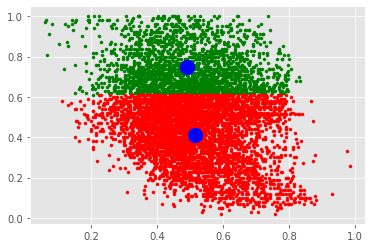

In [18]:
model = K_Means(X,K)  #pemanggilan class K_Means
model.fit(X)          #memanggil fungsi fit pada model
colors = 10 * ["g", "r", "c", "b", "k"]

#plot titik centroid
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], alpha=1, marker="o", c="b", s=150, linewidth=3, zorder=10)

#plot data yang akan dicluster 
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], alpha=1, marker=".", color=color)

plt.show()

# Evaluasi (Elbow Method)
Proses evaluasi menggunakan *Elbow Method* yang bertujuan untuk mendapatkan hasil *clustering* yang optimal.

In [19]:
WCSS_array=np.array([])     #membuat variabel baru untuk menampung array
mapping={}                  #membuat list nilai

for K in range(1,10):
    kmeans=K_Means(X,K)
    kmeans.elbow(max_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    #menghitung nilai WCSS_array
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)
    #memasukkan WCSS_array ke dalam mapping
    mapping[k] = np.min(WCSS_array).tolist()

In [20]:
#output hasil dari setiap k
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

0 : 414.3869685013816
1 : 225.15665802737507
2 : 165.54609093555933
3 : 117.34543271213744
4 : 96.8402325764647
5 : 82.02513366619807
6 : 71.71684625787603
7 : 64.5461774605226
8 : 56.76502618630186


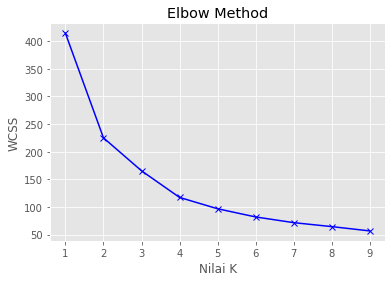

In [21]:
#plotting
k = np.arange(1,10)
plt.plot(k, WCSS_array,'-bx')
plt.xlabel('Nilai K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

Berdasarkan plot grafik diatas, dapat disimpulkan bahwa evaluasi hasil pada *elbow method* memperlihatkan bahwa jumlah cluster terbaik adalah 2.

# Eksperimen

**Eksperimen 1**
<br>
Menggunakan nilai K = 3

In [22]:
X = df_clustering.values  #mengambil nilai dari data df_clustering
tol = 0.1                 #toleransi penghentian
m = X.shape[0]            #print jumlah baris data
K = 3                     #inisialisasi titik centroid
max_iter = 50             #banyaknya jumlah iterasi

18.742531503940167
2.0017627781492324
0.2538323310429489


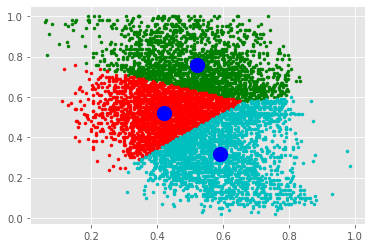

In [23]:
model = K_Means(X,K)  #pemanggilan class K_Means
model.fit(X)          #memanggil fungsi fit pada model
colors = 10 * ["g", "r", "c", "b", "k"]

#plot titik centroid
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], alpha=1, marker="o", c="b", s=150, linewidth=3, zorder=10)

#plot data yang akan dicluster 
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], alpha=1, marker=".", color=color)

plt.show()

**Eksperimen 2**
<br>
Menggunakan nilai K = 5

In [24]:
X = df_clustering.values  #mengambil nilai dari data df_clustering
tol = 0.1                 #toleransi penghentian
m = X.shape[0]            #print jumlah baris data
K = 5                     #inisialisasi titik centroid
max_iter = 50             #banyaknya jumlah iterasi

18.742531503940167
5.719157231868161
8.444736289163082
37.86181153944617
4.8300581745197215
0.12906138784880272
11.042428994635777
10.239379926936063
1.134254303007128
4.902515235209248
4.345096487085009
2.5413885665427713
3.0198936894049866
1.4241753759937725
1.018542703280922
0.526040526607684
0.7076738960468305
0.24106331227532468
0.3036115137861066
0.49105071077545914
0.14428156517622773
0.10772436377292904
0.6800752604696404
0.42430088904652274
0.157501593124863
0.7090764442941473
0.4930030733169613
0.41690219995712935
0.11727149364626364
0.28746604182177565
0.19985354992553483


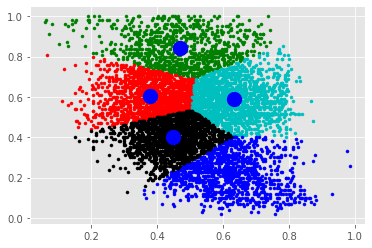

In [25]:
model = K_Means(X,K)  #pemanggilan class K_Means
model.fit(X)          #memanggil fungsi fit pada model
colors = 10 * ["g", "r", "c", "b", "k"]

#plot titik centroid
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], alpha=1, marker="o", c="b", s=150, linewidth=3, zorder=10)

#plot data yang akan dicluster 
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], alpha=1, marker=".", color=color)

plt.show()